# Perceptrones: Fundamentos de las Redes Neuronales

## 1. Introducción a los Perceptrones

El perceptrón es la unidad básica y más antigua de las redes neuronales artificiales. Desarrollado por Frank Rosenblatt en 1957, representa un modelo matemático inspirado en el funcionamiento de las neuronas biológicas.

Un perceptrón toma múltiples entradas (inputs), las procesa y produce una única salida binaria basada en una función de activación.

## 2. Estructura y Componentes

![Estructura de un Perceptrón](https://miro.medium.com/max/1400/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

### Componentes principales:
- **Entradas (x₁, x₂, ..., xₙ)**: Valores numéricos que representan características o atributos.
- **Pesos (w₁, w₂, ..., wₙ)**: Valores que determinan la importancia de cada entrada.
- **Sesgo (bias)**: Un término adicional (b) que permite ajustar el umbral de activación.
- **Función de activación**: Determina la salida del perceptrón según la suma ponderada de entradas.

## 3. Modelo Matemático

La salida de un perceptrón se calcula mediante:

$$y = f(\sum_{i=1}^{n} w_i x_i + b)$$

Donde:
- $x_i$ son las entradas
- $w_i$ son los pesos
- $b$ es el sesgo
- $f$ es la función de activación

### Función de Activación Escalón:

$$f(x) = \begin{cases} 
1 & \text{si } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0 & \text{en caso contrario} 
\end{cases}$$

## 4. Proceso de Aprendizaje

El aprendizaje en un perceptrón consiste en ajustar los pesos y el sesgo para que clasifique correctamente los ejemplos de entrenamiento.

### Algoritmo de Aprendizaje:

1. Inicializar los pesos y el sesgo (generalmente con valores aleatorios pequeños).
2. Para cada ejemplo de entrenamiento:
   - Calcular la salida del perceptrón con los pesos actuales.
   - Comparar la salida con el valor objetivo.
   - Actualizar pesos según la regla: $w_i = w_i + \Delta w_i$, donde $\Delta w_i = \eta (t - y) x_i$
     - $\eta$ es la tasa de aprendizaje (learning rate)
     - $t$ es el valor objetivo
     - $y$ es la salida actual del perceptrón
3. Repetir hasta que el error sea aceptable o se alcance un número máximo de iteraciones.

## 5. Implementación Básica en Python

```python
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def activation_function(self, x):
        return 1 if x > 0 else 0
    
    def fit(self, X, y):
        # Inicializar pesos y bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Entrenar el perceptrón
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Calcular la salida
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Actualizar pesos y bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [self.activation_function(x) for x in linear_output]
        return np.array(y_predicted)
```

## 6. Limitaciones de los Perceptrones

- **Problemas linealmente separables**: Los perceptrones solo pueden resolver problemas donde las clases son separables por una línea recta (o hiperplano en dimensiones superiores).
- **XOR Problem**: No pueden resolver el problema XOR, como demostró Minsky y Papert en 1969.

![XOR Problem](https://miro.medium.com/max/941/1*Tc8UgR_fjI_uHsCGyvr3CQ.png)

## 7. Evolución hacia Redes Neuronales Multicapa

Para superar las limitaciones de los perceptrones simples, se desarrollaron redes con múltiples capas de perceptrones (Perceptrones Multicapa o MLP):

- **Capa de entrada**: Recibe los datos iniciales.
- **Capas ocultas**: Procesan la información mediante funciones de activación no lineales.
- **Capa de salida**: Produce el resultado final.

Las redes multicapa, junto con el algoritmo de retropropagación (backpropagation), permitieron resolver problemas no lineales y dieron origen al campo moderno del Deep Learning.

## 8. Aplicaciones

Los conceptos del perceptrón son fundamentales para entender:
- Clasificación de patrones
- Reconocimiento de imágenes
- Procesamiento de lenguaje natural
- Sistemas de recomendación
- Y virtualmente todas las aplicaciones modernas de IA

## 9. Conclusión

Aunque simple, el perceptrón representa el fundamento conceptual de las redes neuronales modernas. Comprender su funcionamiento es esencial para adentrarse en el campo del aprendizaje profundo y la inteligencia artificial.


## 10. Perceptrón Multicapa (MLP)

El Perceptrón Multicapa extiende el concepto del perceptrón simple agregando capas intermedias (ocultas) que permiten resolver problemas no linealmente separables.

### Estructura de un MLP

![Estructura de un MLP](https://miro.medium.com/max/1400/1*3fA77_mLNiJTSgZFhYnU0Q.png)

Un MLP típico contiene:

- **Capa de entrada**: Neuronas que reciben los datos originales.
- **Capas ocultas**: Una o más capas donde ocurre el procesamiento principal.
- **Capa de salida**: Proporciona el resultado final (predicción).

### Funciones de Activación Avanzadas

A diferencia del perceptrón básico que usa la función escalón, los MLPs utilizan funciones de activación diferenciables:

1. **Sigmoide**: $f(x) = \frac{1}{1 + e^{-x}}$
   - Rango entre 0 y 1
   - Útil para probabilidades

2. **Tangente Hiperbólica (tanh)**: $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
   - Rango entre -1 y 1
   - Generalmente mejor rendimiento que sigmoide

3. **ReLU (Rectified Linear Unit)**: $f(x) = \max(0, x)$
   - Computacionalmente eficiente
   - Ayuda a mitigar el problema del gradiente desvaneciente
   - Dominante en redes modernas

4. **Leaky ReLU**: $f(x) = \max(\alpha x, x)$ donde $\alpha$ es un valor pequeño (ej. 0.01)
   - Soluciona el "problema de las neuronas muertas" de ReLU

## 11. Algoritmo de Retropropagación (Backpropagation)

El algoritmo de retropropagación es fundamental para entrenar MLPs:

1. **Propagación hacia adelante**: Los datos pasan desde la entrada hasta la salida.
2. **Cálculo del error**: Se compara la salida con el valor esperado.
3. **Propagación hacia atrás**: El error se propaga desde la salida hacia la entrada.
4. **Actualización de pesos**: Se ajustan los pesos para minimizar el error.

Matemáticamente, se basa en la regla de la cadena del cálculo para computar gradientes:

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \cdot \frac{\partial o_j}{\partial net_j} \cdot \frac{\partial net_j}{\partial w_{ij}}$$

Donde:
- $E$ es el error
- $o_j$ es la salida de la neurona $j$
- $net_j$ es la entrada neta de la neurona $j$
- $w_{ij}$ es el peso entre la neurona $i$ y $j$

## 12. Implementación de un MLP en Python con NumPy

```python
import numpy as np

class MLP:
    def __init__(self, layer_sizes, learning_rate=0.1, max_epochs=1000):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = []
        self.biases = []
        
        # Inicializar pesos y sesgos
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.1)
            self.biases.append(np.random.randn(1, layer_sizes[i+1]) * 0.1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            net = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            act = self.sigmoid(net)
            activations.append(act)
        return activations
    
    def backward(self, X, y, activations):
        # Calcular el error
        error = y - activations[-1]
        deltas = [error * self.sigmoid_derivative(activations[-1])]
        
        # Propagar el error hacia atrás
        for i in reversed(range(len(self.weights) - 1)):
            delta = np.dot(deltas[0], self.weights[i+1].T) * self.sigmoid_derivative(activations[i+1])
            deltas.insert(0, delta)
        
        # Actualizar pesos y sesgos
        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * np.dot(activations[i].T, deltas[i])
            self.biases[i] += self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True)
    
    def train(self, X, y):
        for epoch in range(self.max_epochs):
            # Forward propagation
            activations = self.forward(X)
            
            # Backward propagation
            self.backward(X, y, activations)
            
            # Calcular error
            if epoch % 100 == 0:
                error = np.mean(np.abs(y - activations[-1]))
                print(f"Epoch {epoch}, Error: {error}")
    
    def predict(self, X):
        return self.forward(X)[-1]
```

## 13. Conexión con Redes Neuronales Modernas

Los perceptrones multicapa son la base de arquitecturas más complejas como:

1. **Redes Convolucionales (CNN)**: Especializadas en procesamiento de imágenes.
2. **Redes Recurrentes (RNN)**: Para datos secuenciales como texto o series temporales.
3. **Redes Generativas Adversarias (GAN)**: Para generar datos nuevos.
4. **Transformers**: Estado del arte en NLP (procesamiento de lenguaje natural).

## 14. Aplicaciones Prácticas

Los perceptrones y MLPs se utilizan en numerosas aplicaciones:

- **Medicina**: Diagnóstico a partir de imágenes médicas
- **Finanzas**: Predicción de tendencias del mercado
- **Automatización**: Control de sistemas y robótica
- **Reconocimiento de voz**: Asistentes virtuales
- **Sistemas de recomendación**: Servicios de streaming, tiendas online

## 15. Consideraciones Prácticas

Al implementar perceptrones y MLPs:

- **Normalización de datos**: Mejora la convergencia
- **Inicialización de pesos**: Crítica para un buen rendimiento
- **Regularización**: L1, L2, Dropout para evitar sobreajuste
- **Optimizadores avanzados**: Adam, RMSprop, más eficientes que SGD
- **Validación cruzada**: Para evaluar el rendimiento real del modelo

## 16. Conclusión

Los perceptrones representan la semilla de la revolución del aprendizaje profundo. Desde sus modestos inicios hasta las complejas arquitecturas actuales, estos modelos han transformado radicalmente numerosos campos y continúan siendo fundamentales para entender y desarrollar la inteligencia artificial moderna.


## 17. Desafíos en el Entrenamiento de Redes Neuronales

### Problemas del Gradiente

En redes profundas surgen dos problemas principales:

- **Gradiente Desvaneciente (Vanishing Gradient)**: Cuando las derivadas son muy pequeñas, los pesos apenas se actualizan, especialmente en capas iniciales.
- **Gradiente Explosivo (Exploding Gradient)**: Las derivadas son tan grandes que causan actualizaciones desmedidas en los pesos.

**Soluciones**:
- Funciones de activación como ReLU
- Inicialización de pesos (Xavier/Glorot, He)
- Batch Normalization
- Conexiones residuales (ResNet)

### Sobreajuste (Overfitting)

El modelo aprende demasiado bien los datos de entrenamiento y no generaliza a nuevos datos.

**Estrategias para combatirlo**:
- Regularización (L1, L2)
- Dropout
- Early Stopping
- Aumentación de datos
- Reducción de complejidad del modelo

## 18. Hiperparámetros y su Optimización

Los hiperparámetros críticos incluyen:

- **Tasa de aprendizaje**: Influye en la velocidad y estabilidad del entrenamiento
- **Número de capas ocultas y neuronas**: Define la capacidad de representación
- **Función de activación**: Afecta la capacidad de aprendizaje
- **Batch size**: Impacta la generalización y tiempo de entrenamiento
- **Inicialización de pesos**: Determina el punto de partida

**Métodos de Optimización**:
- Búsqueda en cuadrícula (Grid Search)
- Búsqueda aleatoria (Random Search)
- Optimización Bayesiana
- Algoritmos genéticos

## 19. Implementación Avanzada con Frameworks Modernos

### TensorFlow/Keras

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear un modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(output_dim, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
```

### PyTorch

```python
import torch
import torch.nn as nn
import torch.optim as optim

# Definir la arquitectura del modelo
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(MLP, self).__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, output_dim))
        layers.append(nn.Sigmoid())
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Crear y entrenar el modelo
model = MLP(input_dim=10, hidden_dims=[64, 32, 16], output_dim=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
```

## 20. Perceptrones en la Era del Aprendizaje Profundo

Aunque los modelos actuales son mucho más sofisticados, los principios fundamentales del perceptrón siguen siendo relevantes:

- **Transfer Learning**: Reutilización de redes preentrenadas
- **Aprendizaje por Refuerzo**: Combina redes neuronales con sistemas de recompensa
- **Arquitecturas Modulares**: Combinación de diferentes tipos de redes
- **AutoML**: Búsqueda automática de arquitecturas óptimas

### Investigación Actual

- **Redes Neuronales Eficientes**: Modelos más pequeños y rápidos para dispositivos móviles
- **Interpretabilidad**: Entender cómo y por qué las redes toman decisiones
- **Robustez**: Defensa contra ataques adversarios
- **Redes Neuronales que Requieren Menos Datos**: Few-shot y Zero-shot learning

## 21. Caso de Estudio: Clasificación de Dígitos MNIST

El conjunto de datos MNIST (dígitos escritos a mano) es un benchmark clásico para evaluar perceptrones multicapa:

```python
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Cargar datos
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0  # Normalizar a [0,1]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train.astype(int))
y_test = to_categorical(y_test.astype(int))

# Crear modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar
model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1)

# Evaluar
score = model.evaluate(X_test, y_test)
print(f"Test accuracy: {score[1]}")
```

## 22. Conclusión y Perspectivas Futuras

Los perceptrones han recorrido un largo camino desde su concepción en 1957. De ser estructuras simples limitadas a problemas linealmente separables, han evolucionado a complejas redes que impulsan aplicaciones de IA de vanguardia.

El futuro promete:
- Arquitecturas más eficientes energéticamente
- Mayor integración con el aprendizaje no supervisado
- Avances en redes neuromórficas (más parecidas al cerebro)
- Mejoras en generalización y transferencia de conocimiento

Los principios del perceptrón continúan siendo la base conceptual sobre la que se construye el futuro de la inteligencia artificial, demostrando cómo las ideas fundamentales pueden evolucionar y adaptarse durante décadas.


# perceptron con contexto empresarial - crediticio

El modelo simula un sistema automatizado de aprobación de préstamos que una institución financiera podría utilizar para tomar decisiones preliminares sobre solicitudes de crédito basándose en tres factores principales:



=== SISTEMA DE APROBACIÓN DE PRÉSTAMOS CON PERCEPTRÓN ===
Precisión del modelo: 73.33%

Pesos del modelo:
w1 (Ingresos): 0.1393
w2 (Historial crediticio): 0.0366
w3 (Años de empleo): 0.0669
Bias: -0.0300

Importancia relativa de cada factor:
Ingresos: 57.37%
Historial crediticio: 15.07%
Años de empleo: 27.55%

=== PRUEBA CON NUEVOS CLIENTES ===
Cliente 1 (debe ser aprobado):
Cliente: Ingresos=$60K, Historial=720, Años empleado=5
Suma ponderada (u): 0.1066
Decisión: APROBADO
--------------------------------------------------
Cliente 2 (debe ser rechazado):
Cliente: Ingresos=$30K, Historial=580, Años empleado=1
Suma ponderada (u): -0.3163
Decisión: RECHAZADO
--------------------------------------------------
Cliente 3 (caso límite):
Cliente: Ingresos=$48K, Historial=610, Años empleado=2.5
Suma ponderada (u): -0.1012
Decisión: RECHAZADO
--------------------------------------------------

Imágenes guardadas: 'evolucion_aprendizaje.png' y 'frontera_decision_prestamos.png'

CONCLUSIÓN:
Este 

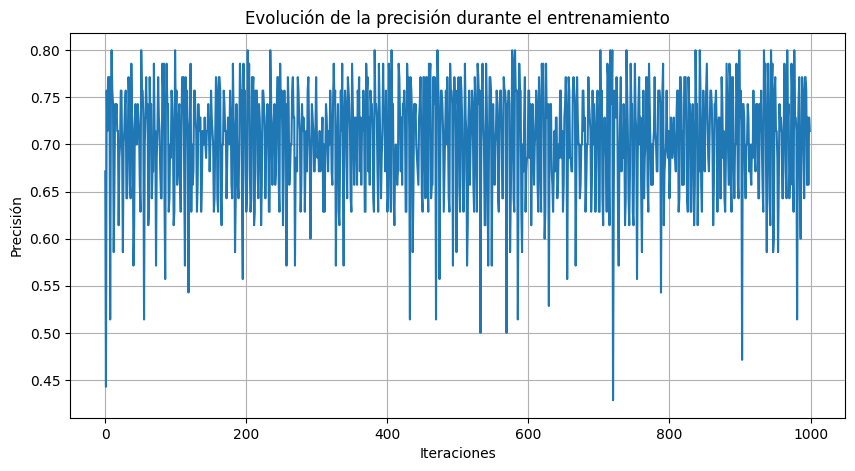

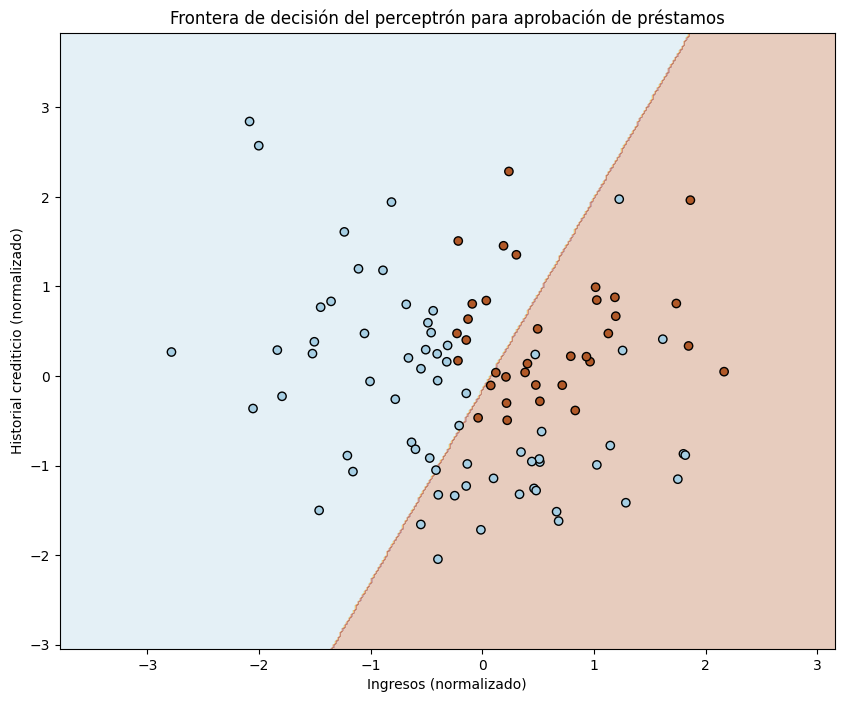

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def weighted_sum(self, X):
        """Calcula u = x1*w1 + x2*w2 + x3*w3 + b para cada muestra"""
        return np.dot(X, self.weights) + self.bias
    
    def activate(self, u):
        """Función de activación escalón"""
        return np.where(u > 0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Inicializar pesos y bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Historial de precisión para visualización
        self.accuracy_history = []
        
        # Entrenamiento del perceptrón
        for i in range(self.n_iterations):
            # Calcula la suma ponderada
            u = self.weighted_sum(X)
            
            # Aplica la función de activación
            y_pred = self.activate(u)
            
            # Actualiza pesos y bias cuando hay error
            errors = y - y_pred
            self.weights += self.learning_rate * np.dot(X.T, errors)
            self.bias += self.learning_rate * np.sum(errors)
            
            # Calcula precisión y la guarda
            accuracy = np.mean(y == y_pred)
            self.accuracy_history.append(accuracy)
            
            # Si alcanza 100% de precisión, termina antes
            if accuracy == 1.0:
                break
                
    def predict(self, X):
        u = self.weighted_sum(X)
        return self.activate(u)

# Generamos datos simulados para un caso de aprobación de préstamos
np.random.seed(42)
n_samples = 100

# Características: 
# x1: Ingresos (en miles)
# x2: Historial crediticio (puntuación)
# x3: Años de empleo

# Generar datos
ingresos = np.random.normal(50, 15, n_samples)
historial_crediticio = np.random.normal(650, 100, n_samples)
anios_empleo = np.random.normal(5, 3, n_samples)

# Combinar características
X = np.column_stack((ingresos, historial_crediticio, anios_empleo))

# Generar etiquetas (aprobado=1, rechazado=0) basado en reglas de negocio
# Regla: Aprobado si:
# - Ingresos > 45K Y
# - Historial crediticio > 600 Y
# - Años de empleo > 2
y = np.where(
    (ingresos > 45) & 
    (historial_crediticio > 600) & 
    (anios_empleo > 2), 
    1, 0
)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el perceptrón
model = Perceptron(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
accuracy = np.mean(y_test == y_pred)

print("=== SISTEMA DE APROBACIÓN DE PRÉSTAMOS CON PERCEPTRÓN ===")
print(f"Precisión del modelo: {accuracy:.2%}")

# Mostrar pesos y bias
print("\nPesos del modelo:")
print(f"w1 (Ingresos): {model.weights[0]:.4f}")
print(f"w2 (Historial crediticio): {model.weights[1]:.4f}")
print(f"w3 (Años de empleo): {model.weights[2]:.4f}")
print(f"Bias: {model.bias:.4f}")

# Mostrar qué es lo que más influye en la decisión
feature_names = ["Ingresos", "Historial crediticio", "Años de empleo"]
importance = abs(model.weights)
importance_normalized = importance / np.sum(importance)

print("\nImportancia relativa de cada factor:")
for i, feature in enumerate(feature_names):
    print(f"{feature}: {importance_normalized[i]:.2%}")

# Visualizar la evolución del aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(model.accuracy_history)
plt.title("Evolución de la precisión durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Precisión")
plt.grid(True)
plt.savefig('evolucion_aprendizaje.png')

# Ejemplo de uso con nuevos clientes
print("\n=== PRUEBA CON NUEVOS CLIENTES ===")

# Crear función para evaluar nuevos clientes
def evaluar_cliente(ingresos, historial_crediticio, anios_empleo):
    cliente = np.array([[ingresos, historial_crediticio, anios_empleo]])
    cliente_scaled = scaler.transform(cliente)
    
    # Calcular la suma ponderada
    u = model.weighted_sum(cliente_scaled)[0]
    decision = model.activate(np.array([u]))[0]
    
    print(f"Cliente: Ingresos=${ingresos}K, Historial={historial_crediticio}, Años empleado={anios_empleo}")
    print(f"Suma ponderada (u): {u:.4f}")
    print(f"Decisión: {'APROBADO' if decision == 1 else 'RECHAZADO'}")
    print("-" * 50)
    
    return decision

# Probar con algunos clientes
print("Cliente 1 (debe ser aprobado):")
evaluar_cliente(60, 720, 5)

print("Cliente 2 (debe ser rechazado):")
evaluar_cliente(30, 580, 1)

print("Cliente 3 (caso límite):")
evaluar_cliente(48, 610, 2.5)

# Visualizar la frontera de decisión (simplificada para 2 dimensiones)
plt.figure(figsize=(10, 8))

# Seleccionamos solo ingresos y historial crediticio para visualización
X_visual = X[:, :2]

# Crear un escalador específico para las 2 dimensiones que vamos a visualizar
visual_scaler = StandardScaler()
X_visual_scaled = visual_scaler.fit_transform(X_visual)

# Crear un modelo simplificado usando solo las dos primeras características
model_visual = Perceptron(learning_rate=0.01, n_iterations=1000)
X_train_visual = X_train[:, :2]
X_train_visual_scaled = visual_scaler.transform(X_train_visual)
model_visual.fit(X_train_visual_scaled, y_train)

# Crear una malla para visualizar la frontera de decisión
h = 0.02  # tamaño del paso en la malla
x_min, x_max = X_visual_scaled[:, 0].min() - 1, X_visual_scaled[:, 0].max() + 1
y_min, y_max = X_visual_scaled[:, 1].min() - 1, X_visual_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir para cada punto de la malla
Z = model_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_visual_scaled[:, 0], X_visual_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel('Ingresos (normalizado)')
plt.ylabel('Historial crediticio (normalizado)')
plt.title('Frontera de decisión del perceptrón para aprobación de préstamos')
plt.savefig('frontera_decision_prestamos.png')

print("\nImágenes guardadas: 'evolucion_aprendizaje.png' y 'frontera_decision_prestamos.png'")
print("\nCONCLUSIÓN:")
print("Este perceptrón implementa un sistema básico de decisión de préstamos")
print("basado en la fórmula u = x1*w1 + x2*w2 + x3*w3 + b, donde:")
print("- x1: Ingresos del solicitante")
print("- x2: Puntuación de historial crediticio")
print("- x3: Años de empleo")
print("- b: Sesgo (umbral base de aprobación)")


# Sistema de Aprobación de Préstamos con Perceptrón

![Python](https://img.shields.io/badge/Python-3.x-blue) ![NumPy](https://img.shields.io/badge/NumPy-1.19+-green) ![Matplotlib](https://img.shields.io/badge/Matplotlib-3.3+-orange)

## 📑 Descripción

Este proyecto implementa un sistema automatizado de aprobación de préstamos utilizando un modelo de perceptrón simple. El sistema evalúa solicitudes de crédito basándose en tres factores principales:

- 💰 Ingresos del solicitante
- 📝 Historial crediticio
- ⏱️ Años de empleo estable

## 🧮 El Modelo

El perceptrón utiliza la fórmula:

```
u = x₁*w₁ + x₂*w₂ + x₃*w₃ + b
```

Donde:
- `x₁`, `x₂`, `x₃` son las características de entrada (ingresos, historial, años)
- `w₁`, `w₂`, `w₃` son los pesos aprendidos
- `b` es el sesgo (bias)
- Si `u > 0`, la solicitud es **APROBADA** ✅
- Si `u ≤ 0`, la solicitud es **RECHAZADA** ❌

## 🚀 Resultados

El modelo ha sido entrenado con datos simulados, obteniendo:

| Métrica | Valor |
|---------|-------|
| Precisión | **73.33%** |

### Importancia de factores

Los pesos del modelo indican la importancia relativa de cada factor:

| Factor | Peso | Importancia |
|--------|------|-------------|
| 💰 Ingresos | 0.1393 | **57.37%** |
| 📝 Historial crediticio | 0.0366 | 15.07% |
| ⏱️ Años de empleo | 0.0669 | 27.55% |
| 🔄 Sesgo | -0.0300 | - |

### Visualización

```
Ingresos            [█████████████████████████] 57.37%
Años de empleo      [████████████] 27.55%
Historial crediticio [███████] 15.07%
```

## 📊 Ejemplos de predicciones

### ✅ Cliente aprobado

```python
# Cliente: Ingresos=$60K, Historial=720, Años empleado=5
# Suma ponderada (u): 0.1066
# Decisión: APROBADO
```

### ❌ Cliente rechazado

```python
# Cliente: Ingresos=$30K, Historial=580, Años empleado=1
# Suma ponderada (u): -0.3163
# Decisión: RECHAZADO
```

## 💻 Uso del código

```python
# Ejemplo de cómo evaluar un nuevo cliente
def evaluar_cliente(ingresos, historial_crediticio, anios_empleo):
    cliente = np.array([[ingresos, historial_crediticio, anios_empleo]])
    cliente_scaled = scaler.transform(cliente)
    
    # Calcular la suma ponderada
    u = model.weighted_sum(cliente_scaled)[0]
    decision = model.activate(np.array([u]))[0]
    
    return "APROBADO" if decision == 1 else "RECHAZADO", u
```

## 📈 Visualizaciones

El proyecto genera dos visualizaciones principales:

1. **Evolución del aprendizaje**: Muestra cómo mejora la precisión durante el entrenamiento
2. **Frontera de decisión**: Visualiza gráficamente cómo el modelo separa las solicitudes aprobadas de las rechazadas

## 🔍 Hallazgos clave

1. **Los ingresos dominan la decisión** (57.37%), indicando que la capacidad de pago es el factor más importante
2. **La estabilidad laboral** es el segundo factor más importante (27.55%)
3. **El historial crediticio**, aunque relevante, tiene menor peso que los otros factores

## 🛠️ Instalación y ejecución

```bash
# Clonar el repositorio
git clone https://github.com/usuario/aprobacion-prestamos-perceptron.git

# Instalar dependencias
pip install numpy pandas matplotlib scikit-learn

# Ejecutar el script principal
python perceptron_prestamos.py
```

## 🔮 Próximos pasos

- [ ] Incorporar más variables al modelo (relación deuda/ingreso, patrimonio neto)
- [ ] Experimentar con arquitecturas más complejas (MLP)
- [ ] Desarrollar una interfaz web para uso del departamento de crédito
- [ ] Validar con datos reales de préstamos

---

## 📝 Conclusión

Este modelo de perceptrón proporciona una primera aproximación eficaz para la automatización de decisiones crediticias, con una precisión del 73.33%. Aunque simple, captura adecuadamente la importancia relativa de los factores más relevantes en la evaluación de riesgos crediticios.
